Linear algebra library

In [2]:
import numpy as np 

Dataframe LIbrary

In [3]:
import pandas as pd 

data visualization library

In [4]:
import matplotlib.pyplot as plt

 statistical data visualization library

In [5]:
import seaborn as sns 

aligning plots inline

In [6]:
%matplotlib inline

Ignoring warnings library

In [7]:
import warnings
warnings.filterwarnings('ignore')

Encoding Libary

In [8]:
from sklearn.preprocessing import LabelEncoder

Reading the Dataset/ Data Preparation

In [10]:
df = pd.read_csv('StudentsPerformance.csv')

# Determining dataset shape

In [11]:
df.shape

(1000, 8)

# Previewing the data

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Determining the dataset Summary

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Determining null values in the dataset

In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

From the output above , we can see that the Student Performance Dataset doesn't contain any null values .

# Determining the numerical variable's statistical summary

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Renaming some of the columns / Truncating the names of some of the columns in the Student Performance Dataset

In [16]:
df.rename(columns = {"race/ethnicity":"race","parental level of education":"parental_edu", 
                     "math score":"math_score", "reading score":"reading_Score", "writing score":"writing_score", 
                     "test preparation course":"test_prep_course"}, inplace = True)

In [17]:
df.head()

,gender,race,parental_edu,lunch,test_prep_course,math_score,reading_Score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The output shown above shows the renamed dataset to fit the clustering criteria

Exploring each of the 5 categorical Variables {gender , race,parental_edu,test_prep_course and lunch} as shown below.Also known as String Variables

# 1.Gender Categorical Variable

 viewing the labels in the gender variable

In [18]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

viewing the different types of variables which are in the gender variable

In [19]:
len(df['gender'].unique())

2

# 2.Race Categorical Variable

viewing the labels in the race variable

In [20]:
df['race'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

viewing the different types of variables which are in the race variable

In [21]:
len(df['race'].unique())

5

# 3.Parental level of education as a Categorical Variable

Viewing the labels in the parental_edu variable

In [22]:
df['parental_edu'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

viewing the different types of variables which are in the parental_edu variable

In [23]:
len(df['parental_edu'].unique())

6

# 4. Test Preparation Course as a Categorical Variable

Viewing the labels in the test_prep_course variable

In [24]:
df['test_prep_course'].unique()

array(['none', 'completed'], dtype=object)

viewing the different types of variables which are in the test_prep_course variable

In [25]:
len(df['test_prep_course'].unique())

2

# 5. Lunch as a Categorical Variable

Viewing the labels in the lunch variable

In [26]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

viewing the different types of variables which are in the lunch variable

In [27]:
len(df['lunch'].unique())

2

Converting categorical coulmns into numerical to check the correlation

In [28]:
gender = {'female': 0, 'male': 1}
race = dict(zip(df['race'].unique(), range(df['race'].nunique())))
parental = dict(zip(df['parental_edu'].unique(), range(df['parental_edu'].nunique())))
lunch = dict(zip(df['lunch'].unique(), range(df['lunch'].nunique())))
test = dict(zip(df['test_prep_course'].unique(), range(df['test_prep_course'].nunique())))
df['gender'] = [gender[x] for x in df['gender']]
df['race'] = [race[x] for x in df['race']]
df['parental_edu'] = [parental[x] for x in df['parental_edu']]
df['lunch'] = [lunch[x] for x in df['lunch']]
df['test_prep_course'] = [test[x] for x in df['test_prep_course']]
df.head()

,gender,race,parental_edu,lunch,test_prep_course,math_score,reading_Score,writing_score
0,0,0,0,0,0,72,72,74
1,0,1,1,0,1,69,90,88
2,0,0,2,0,0,90,95,93
3,1,2,3,1,0,47,57,44
4,1,1,1,0,0,76,78,75


<AxesSubplot:>

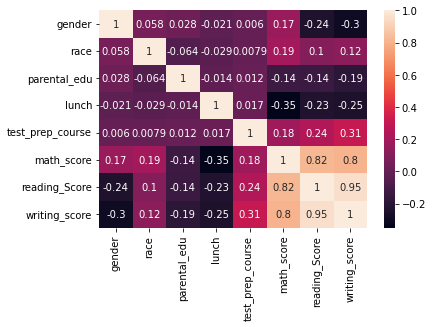

In [29]:
sns.heatmap(df.corr(), annot=True)

Droping  race, gender, lunch, parental_edu variables from the dataset which are categorical and are not that much usefull for our analysis and the correlation with other variables is very less

In [30]:
df.drop(['race', 'gender','lunch','parental_edu'], axis=1, inplace=True)

Reviewing Dataset Summary 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   test_prep_course  1000 non-null   int64
 1   math_score        1000 non-null   int64
 2   reading_Score     1000 non-null   int64
 3   writing_score     1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


Checking Dataset Head

In [32]:
df.head()

,test_prep_course,math_score,reading_Score,writing_score
0,0,72,72,74
1,1,69,90,88
2,0,90,95,93
3,0,47,57,44
4,0,76,78,75


# Declaring Feature Vectors and Target Variables

In [33]:
X = df

y = df['test_prep_course']

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   test_prep_course  1000 non-null   int64
 1   math_score        1000 non-null   int64
 2   reading_Score     1000 non-null   int64
 3   writing_score     1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


Re-checking Dataset(X)

In [35]:
X.head()

,test_prep_course,math_score,reading_Score,writing_score
0,0,72,72,74
1,1,69,90,88
2,0,90,95,93
3,0,47,57,44
4,0,76,78,75


# Incorporating Feature Scaling to the Dataset

In [36]:
cols = X.columns

In [37]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [38]:
X = pd.DataFrame(X, columns=[cols])

In [39]:
X.head()

,test_prep_course,math_score,reading_Score,writing_score
0,0.0,0.72,0.662651,0.711111
1,1.0,0.69,0.879518,0.866667
2,0.0,0.90,0.939759,0.922222
3,0.0,0.47,0.481928,0.377778
4,0.0,0.76,0.734940,0.722222


# A) K-Means Clustering Method  (distance between points)

# K-Means model with two clusters

In [38]:
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=2, random_state=0) 

kmeans_2.fit(X)

KMeans(n_clusters=2, random_state=0)

K-Means Model Cluster centres

In [39]:
kmeans_2.cluster_centers_

array([[1.11022302e-15, 6.96955307e-01, 6.85468130e-01, 7.15766605e-01],
       [1.00000000e+00, 6.40778816e-01, 5.96798409e-01, 6.05607477e-01]])

K-Means Inertia with 2 clusters

In [40]:
kmeans_2.inertia_

77.03808486882392

 correctly labeled data

In [41]:
labels = kmeans_2.labels_
true_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (true_labels, y.size))

Result: 1000 out of 1000 samples were correctly labeled.


In [42]:
print('Accuracy score: {0:0.2f}'. format(true_labels/float(y.size)))

Accuracy score: 1.00


Generating a scatter plot based on the data

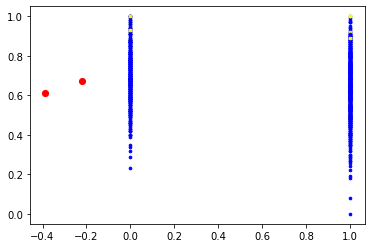

In [43]:
data = X.values[:, 0:3]
category = X.values[:, 3]
k = 2
 
# Training data
n = data.shape[0]
 
# Number of features in the data
c = data.shape[1]
 
# Generating random centers
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean
 
# Plotting data 
colors=['blue', 'yellow']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='.', c='r', s=150)

Generating an Elbow Plot by using the Elbow Method for Kmeans with 2 clusters

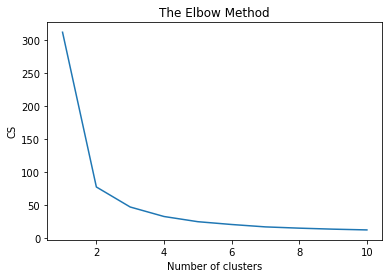

In [44]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans_2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_2.fit(X)
    cs.append(kmeans_2.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [45]:
#Determining potimal k value through programming using kneelocator
from kneed import KneeLocator
kl = KneeLocator( range(1, 11), cs, curve="convex", direction="decreasing" )

kl.elbow

2

The value above shows that the optimal value of Kmeans algorithm is that with 2 clusters as it can be seen  that it has a higher accuracy (100%) than the other two clusters(3 and 4) which falls short.
The optimal value can be obtained by either reading the elbow plot or by programming by use of a KneeLocator as shown above.

# K-Means with 3 Clusters

In [46]:
kmeans_3 = KMeans(n_clusters=3, random_state=0)

kmeans_3.fit(X)

KMeans(n_clusters=3, random_state=0)

 correctly labeled samples

In [47]:
labels = kmeans_3.labels_

true_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (true_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(true_labels/float(y.size)))

Result: 0 out of 1000 samples were correctly labeled.
Accuracy score: 0.00


In [48]:
kmeans_3.cluster_centers_

array([[1.00000000e+00, 7.40664740e-01, 7.22926388e-01, 7.26718048e-01],
       [1.11022302e-15, 6.96955307e-01, 6.85468130e-01, 7.15766605e-01],
       [1.00000000e+00, 5.24020270e-01, 4.49365028e-01, 4.64039039e-01]])

K-Means Inertia with 3 clusters

In [49]:
kmeans_3.inertia_

46.60496696149129

# K_Means with 4 Clusters

In [50]:
kmeans_4 = KMeans(n_clusters=4, random_state=0)

kmeans_4.fit(X)

KMeans(n_clusters=4, random_state=0)

correctly labeled samples

In [51]:
labels = kmeans_4.labels_

true_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (true_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(true_labels/float(y.size)))

Result: 545 out of 1000 samples were correctly labeled.
Accuracy score: 0.55


In [52]:
kmeans_4.cluster_centers_

array([[-1.11022302e-15,  7.85373134e-01,  8.00755260e-01,
         8.17689331e-01],
       [ 1.00000000e+00,  7.41569767e-01,  7.23592043e-01,
         7.27390181e-01],
       [ 1.00000000e+00,  5.24429530e-01,  4.50432603e-01,
         4.65026100e-01],
       [-9.99200722e-16,  5.83757962e-01,  5.37871230e-01,
         5.85279547e-01]])

K-Means Inertia with 4 clusters

In [53]:
kmeans_4.inertia_

32.167604177172976

Clustering Numerical Variable Results into a Box Plot

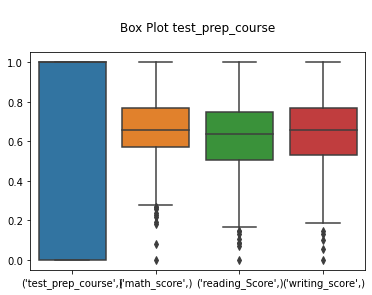

In [54]:
num_cols = ['test_prep_course']

for i in num_cols:
    plt.figure(figsize = (6,4))
    ax = sns.boxplot(data =X)
    plt.title('\nBox Plot {}\n'.format(i), fontsize = 12)
    plt.show()

# B) Dbscan [Density-based spatial clustering of applications with noise ] Clustering Method (distance between nearest points)

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

Text(0, 0.5, '$x_2$')

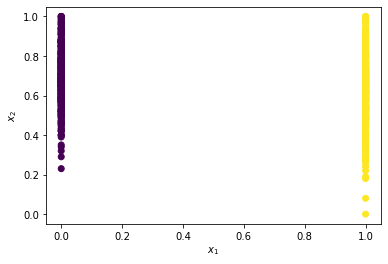

In [86]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Fine-tuning parameters

In [87]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

DBSCAN()

Visualizing DBSCAN

Text(0, 0.5, '$x_2$')

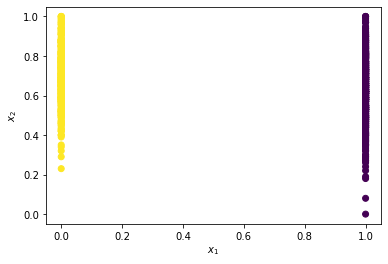

In [89]:
plt.scatter(X.iloc[:, 0], 
            X.iloc[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

 Setting Number of Clusters

In [91]:
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 2


Identifying Noise

In [92]:

n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 0


Calculating v_measure results

In [93]:
print('v_measure =', v_measure_score(y, labels))

v_measure = 1.0


DBSCAN is used with eps = 0.1 and min samples = 8

In [94]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

DBSCAN(eps=0.1, min_samples=8)

Visualizing DBSCAN results

Text(0, 0.5, '$x_2$')

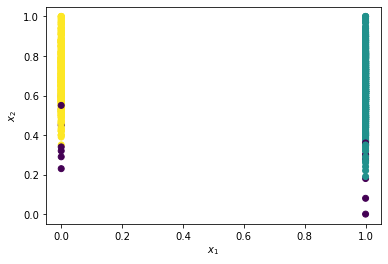

In [96]:
plt.scatter(X.iloc[:, 0], 
X.iloc[:, 1], 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Estimated Number of Clusters

In [97]:
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 2


Identifying Noise in the data

In [98]:
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 16


Calculating the v_measure score

In [99]:
print('v_measure =', v_measure_score(y, labels))

v_measure = 0.9327598953624114


As can be seen, this algorithm generates far too many clusters.
With a v measure score of 0.93, it generates 2 clusters and identifies 16 points as noise.

Finding the Optimal Epsilon Value

In [100]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)

In [101]:
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)

Text(0, 0.5, 'Distance')

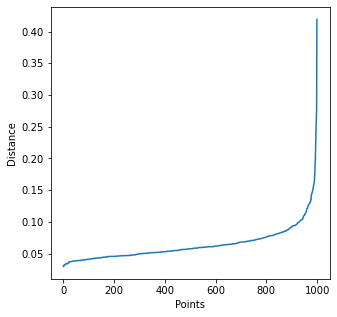

In [102]:
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

# Elbow Point Detection Using a Kneed Package

Visually determining the maximum curvature can be difficult. To detect the knee or elbow point, a Python package called kneed can be used. 'pip install kneed' will install it.

Using the package below, we can see that the elbow point is at 0.08778627763746948, which is the best value of epsilon to use now.

In [103]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')


Text(0, 0.5, 'Distance')

<Figure size 360x360 with 0 Axes>

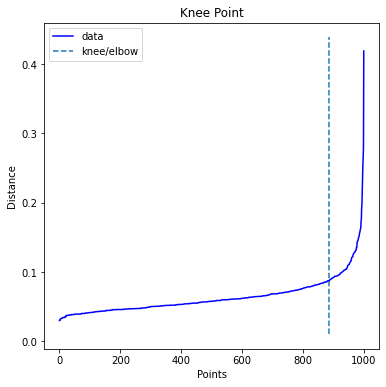

In [104]:
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

In [105]:
print(distances[knee.knee])

0.08778627763746948


# Using DBSCAN with the optimal Epsilon value of 0.08778627763746948

Now that we've determined the optimal value of epsilon as 0.08778627763746948, let's apply it to the DBSCAN algorithm.

This time, the DBSCAN clustering is clearly done correctly, with three clusters and only 21 noise points. With a value of 0.892457390813195, the v measure score is also satisfactory.

In [112]:
dbscan_cluster = DBSCAN(eps=0.088, min_samples=8)
dbscan_cluster.fit(X)

DBSCAN(eps=0.088, min_samples=8)

Visualizing the DBSCAN Results

Text(0, 0.5, '$x_2$')

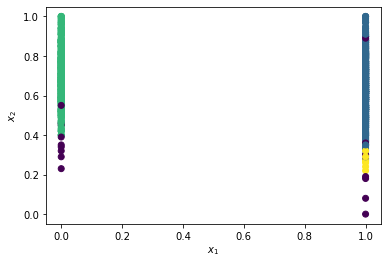

In [113]:
plt.scatter(X.iloc[:, 0], 
X.iloc[:, 1], 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Estimated Number of Clusters

In [114]:
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 3


Identifying Noise

In [115]:
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 21


Calculating the v_measure results

In [116]:
print('v_measure =', v_measure_score(y, labels))

v_measure = 0.892457390813195


# C) Algomerative Clustering Method (Bottom -Up Hierarchical Clustering Method)

Hierachical Agglomerative Clustering Libraries

In [42]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

Scaling the data and normalising data

In [43]:
sc = StandardScaler()
df_scaled = sc.fit_transform(X)
df_normalized = normalize(df_scaled)

Reducing the dimensionality of the dataframe to 3 features

In [44]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3']

Plotting  the Dendogram 

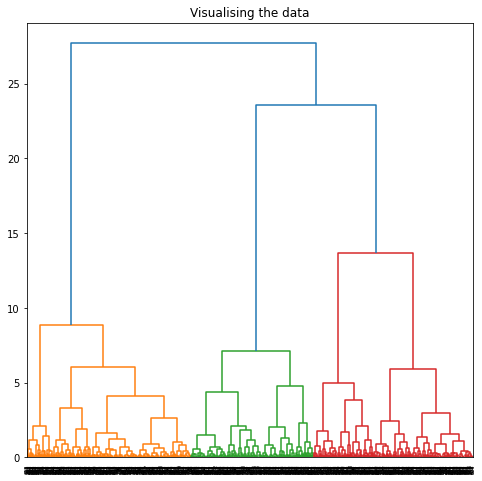

In [45]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='ward')))

Building and Visualizing the different clustering models for different values of k (clusters)

# Level 1 consists of 5 clusters.

Creating the clusters using Agglomerative hierarchical clustering

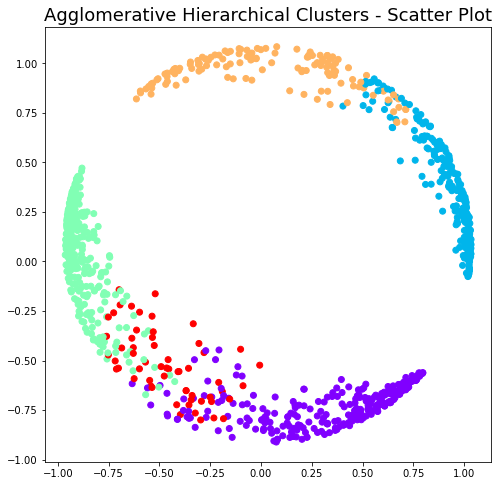

In [46]:
agc5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc5.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

# Level 2 has 4 clusters

Creating the clusters using Agglomerative hierarchical clustering

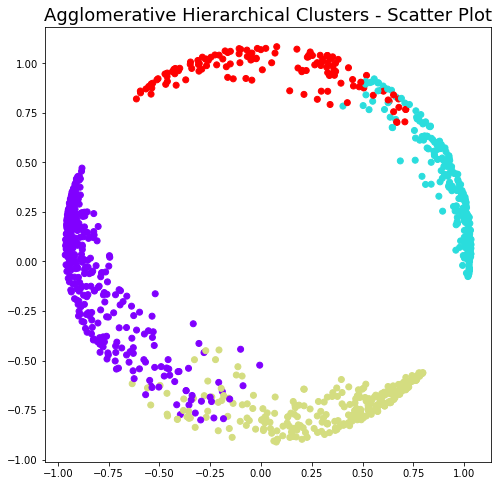

In [55]:
agc4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc4.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

# Level 3 has 3 clusters

Creating the clusters using Agglomerative hierarchical clustering

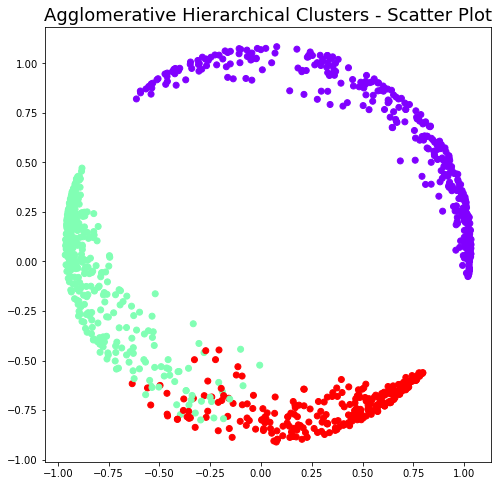

In [56]:
agc3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc3.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

# Level 4 has 2 clusters

Creating the clusters using Agglomerative hierarchical clustering

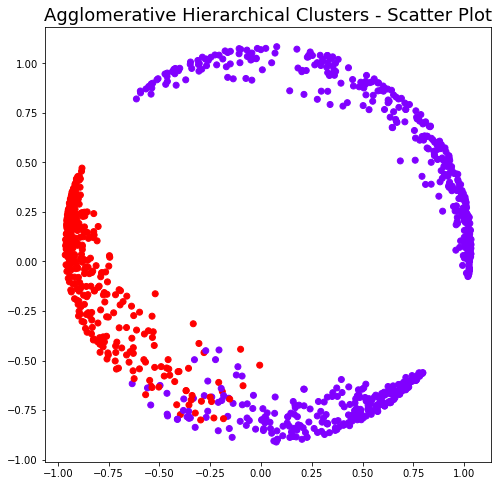

In [57]:
agc2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc2.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

In [58]:
Ag = AgglomerativeClustering(n_clusters=2, linkage='ward')
label =Ag.fit_predict(df_pca)

In [59]:
print(Ag.labels_)

[0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0
 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 1 1 1 0 1 1 0 0 0 1 0 

Evaluating the different models and Visualizing the results using various Silhouette Scores 

Various clusters used

In [60]:
k = [2, 3, 4, 5]

Appending the silhouette scores of the different models {clusters} to the list

In [61]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(df_pca, agc2.fit_predict(df_pca)))
silhouette_scores.append(
        silhouette_score(df_pca, agc3.fit_predict(df_pca)))
silhouette_scores.append(
        silhouette_score(df_pca, agc4.fit_predict(df_pca)))
silhouette_scores.append(
        silhouette_score(df_pca, agc5.fit_predict(df_pca)))

Plotting a bar graph to compare the different model results 

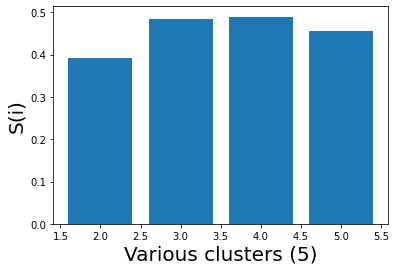

In [62]:
plt.bar(k, silhouette_scores)
plt.xlabel('Various clusters (5)', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

Thus, using the silhouette scores, it is determined that the optimal number of clusters for the aforementioned dataset and clustering technique is four {4}.

Printing the various silhouette_scores  for the various k values

In [63]:
print(k, silhouette_scores)

[2, 3, 4, 5] [0.3917344296175909, 0.4848899351050304, 0.4896978795395136, 0.4549050980779645]


From the results above , it is evident that when the Agglomerative -Hierarchical Clustering is used , the following scores are produced:-
    k=2  , score is 39%
    k=3 , score is 48%
    k=4 , score is 49%
    k=5 , score is 45%

In [66]:
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=4)
a=AC.fit_predict(df_pca)
df_pca["Clusters"]=a

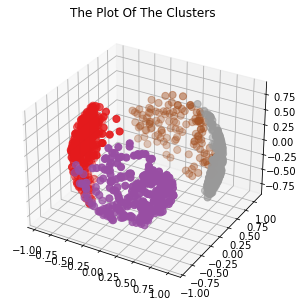

In [68]:
x =df_pca["P1"]
y =df_pca["P2"]
z =df_pca["P3"]
plt.figure(figsize=(5,5))
axs=plt.subplot(111, projection='3d', label="bla")
axs.scatter(x, y, z, s=50, c=df_pca["Clusters"], marker='o', cmap = 'Set1' )
axs.set_title("The Plot Of The Clusters")
plt.show()

# Conclusion

From the 3 different algorithms used {K-means clustering algorithm , DBSCAN clustering algorithm and lastly , Agglomerative clustering method which is a type of a Hierarchical Clustering Method} , it is evident that K-Means make use of accuracy to determine the preciseness of the algorithm , DBSCAN makes use of V_measure to determine the preciseness of the algorithm and finally , Aggomerative -Hierarchical clustering method makes use of the silhouette scores to determine the preciseness of the algorithm